In [1]:
import numpy as np

def laplacian(Z, dx):
    """
    Function to computes the discrete Laplace operator of
    a 2D variable on the grid (using a five-point stencil
    finite difference method.)
    """
    Ztop = Z[0:-2,1:-1]
    Zleft = Z[1:-1,0:-2]
    Zbottom = Z[2:,1:-1]
    Zright = Z[1:-1,2:]
    Zcenter = Z[1:-1,1:-1]
    return (Ztop + Zleft + Zbottom + Zright - 4 * Zcenter) / dx**2


In [2]:
def reaction_diffusion(a=2.8e-4, b=5e-3, tau=0.1, k=-0.005, samples=10):
    """
    We simulate the PDE with the finite difference method.

    The samples value is the number of equally spaced samples
    to collect over the total simulation time T.
    """
    size = 100         # size of the 2D grid
    dx = 2./size       # space step
    T = 10.0           # total time
    dt = 4.5 * dx**2    # simulation time step
    n = int(T/dt)

    result = []
    U = np.random.rand(size, size)
    V = np.random.rand(size, size)

    sample_times = [int(el) for el in np.linspace(0, n, samples)]

    for i in range(n):
        # We compute the Laplacian of u and v.
        deltaU = laplacian(U, dx=dx)
        deltaV = laplacian(V, dx=dx)
        # We take the values of u and v inside the grid.
        Uc = U[1:-1,1:-1]
        Vc = V[1:-1,1:-1]
        # We update the variables.
        U[1:-1,1:-1], V[1:-1,1:-1] = \
            Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k), \
            Vc + dt * (b * deltaV + Uc - Vc) / tau
        # Neumann conditions: derivatives at the edges
        # are null.
        for Z in (U, V):
            Z[0,:] = Z[1,:]
            Z[-1,:] = Z[-2,:]
            Z[:,0] = Z[:,1]
            Z[:,-1] = Z[:,-2]

        if i in sample_times:
            result.append((i * dt,U.copy()))
    return result


In [4]:
import holoviews as hv
hv.notebook_extension()

In [5]:
sim1 = reaction_diffusion()

b':HoloMap   [Time]\n   :Image   [x,y]   (z)'
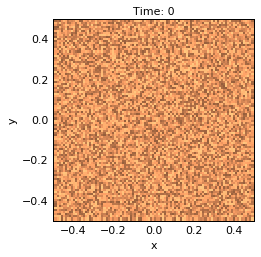
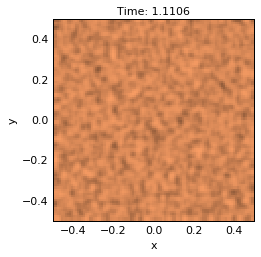
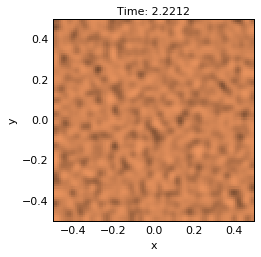
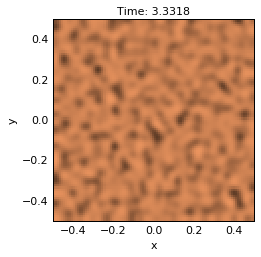
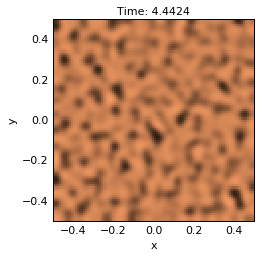
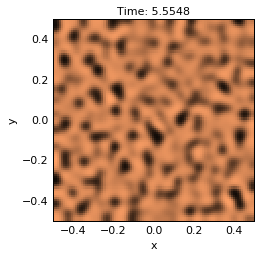
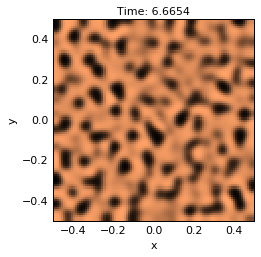
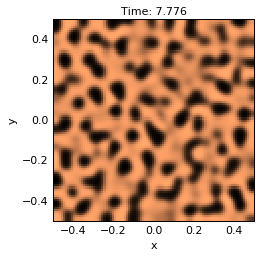
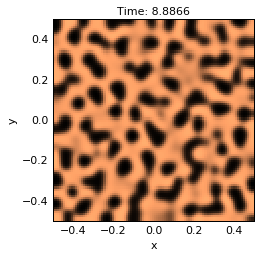

In [6]:


%%opts Image (cmap='copper')
hv.HoloMap({time: hv.Image(array) for (time, array) in sim1}, kdims=['Time'])



In [7]:
array

NameError: name 'array' is not defined

In [8]:
sim1

[(0.0, array([[ 0.14155467,  0.14155467,  0.21383671, ...,  0.51316819,
           0.13641717,  0.13641717],
         [ 0.14155467,  0.14155467,  0.21383671, ...,  0.51316819,
           0.13641717,  0.13641717],
         [ 0.8002171 ,  0.8002171 ,  0.39672163, ...,  0.46072282,
           0.41143628,  0.41143628],
         ..., 
         [ 0.858098  ,  0.858098  ,  0.89250155, ...,  0.16645329,
           0.45507709,  0.45507709],
         [ 0.51850444,  0.51850444,  0.73843022, ...,  0.17020871,
           0.98174477,  0.98174477],
         [ 0.51850444,  0.51850444,  0.73843022, ...,  0.17020871,
           0.98174477,  0.98174477]])),
 (1.1106, array([[ 0.15629822,  0.15629822,  0.15342449, ...,  0.35935411,
           0.16941916,  0.16941916],
         [ 0.15629822,  0.15629822,  0.15342449, ...,  0.35935411,
           0.16941916,  0.16941916],
         [ 0.29971223,  0.29971223,  0.26890009, ...,  0.39384342,
           0.2829638 ,  0.2829638 ],
         ..., 
         [ 0.52689